In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.25, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(15000, 28, 28) (10000, 28, 28) (45000, 28, 28)
(15000,) (10000,) (45000,)


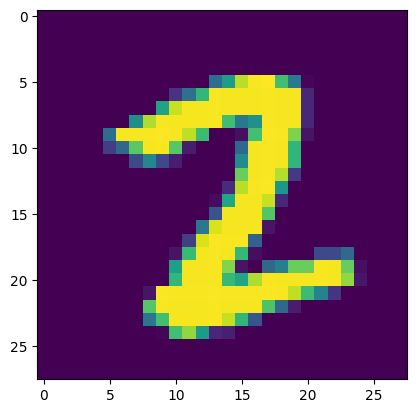

In [4]:
plt.imshow(x_train[0])

In [5]:
tf.keras.layers.SparseCategoricalCrossentropy?

In [12]:
# Using LSTM
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 256)           291840    
                                                                 
 dropout_3 (Dropout)         (None, 28, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                8224      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [13]:
hist = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 15s 20ms/step - loss: 0.8701 - accuracy: 0.7113 - val_loss: 0.2869 - val_accuracy: 0.9155
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3018 - accuracy: 0.9175 - val_loss: 0.1973 - val_accuracy: 0.9435
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1944 - accuracy: 0.9473 - val_loss: 0.1240 - val_accuracy: 0.9641
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1507 - accuracy: 0.9581 - val_loss: 0.1304 - val_accuracy: 0.9626
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.1214 - accuracy: 0.9667 - val_loss: 0.1093 - val_accuracy: 0.9696


In [14]:
# Using LSTM
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.GRU(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(256, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 28, 256)           219648    
                                                                 
 dropout_6 (Dropout)         (None, 28, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [15]:
# Using LSTM
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.SimpleRNN(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(256, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 28, 256)           72960     
                                                                 
 dropout_9 (Dropout)         (None, 28, 256)           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                8224      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 10)               